In [ ]:
# 리지, 라소

In [7]:
import mglearn.datasets

In [9]:
X,y = mglearn.datasets.load_extended_boston()

In [10]:
X.shape

(506, 104)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(
X,y, random_state=0) 
lr = LinearRegression().fit(X_train,y_train)

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

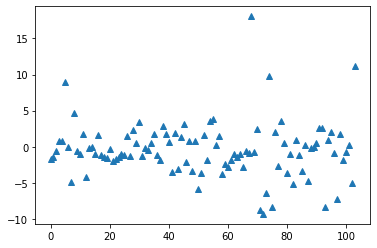

In [17]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, "^", label ="alpha=10")   # ridge는 alpha값 설정이 중요
plt.show()

In [18]:
ridge.coef_.shape

(104,)

In [19]:
X_train.shape

(379, 104)

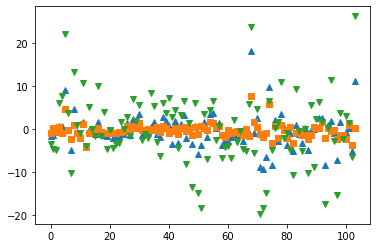

In [24]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, "^", label ="alpha=10")
plt.plot(ridge10.coef_, "s", label ="alpha=1")
plt.plot(ridge01.coef_, "v", label ="alpha=0.1")
plt.show()
# 네모가 위축된 것처럼 보임 = 모여있다
# 파란색을 기준으로 주황색은 위축, 초록색은 더 커짐(alpha가 작으니까 패널티가 별로 안커져서)

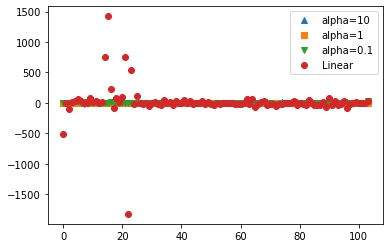

In [25]:
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, "^", label ="alpha=10")
plt.plot(ridge10.coef_, "s", label ="alpha=1")
plt.plot(ridge01.coef_, "v", label ="alpha=0.1")
plt.plot(lr.coef_,"o", label="Linear")
plt.legend()
plt.show()
# linear가 너무 커 다른 것들이 뭉개짐 = linear가 overfit

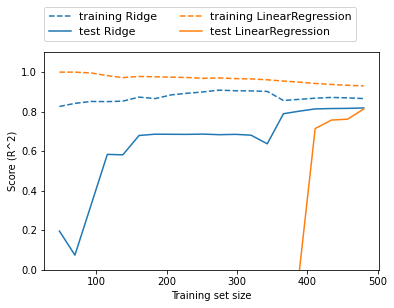

In [26]:
# 규제가 있을 때와 없을 때 차이를 알아보는 그래프
mglearn.plots.plot_ridge_n_samples()
# 파란색-규제 있음, 주황색-규제 없음
# 규제하는 이유:과대적합 줄이기 위해

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [28]:
lasso.score(X_train, y_train)

0.26783778369518485

In [29]:
lasso.score(X_test, y_test)

0.2599232118344591

In [30]:
import numpy as np
np.sum(lasso.coef_!=0) # 3개 공부함 (정민지같음)

3

In [32]:
# 과소적합을 줄이기 위해 알파값(알파카)을 줄임
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)

In [33]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.9707669306960724, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


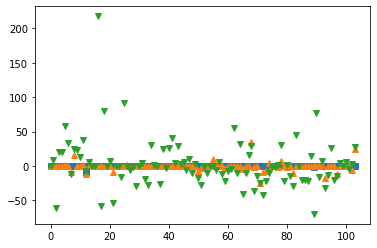

In [34]:
plt.plot(lasso.coef_, "s")
plt.plot(lasso001.coef_, "^")
plt.plot(lasso00001.coef_, "v")

plt.show()

In [35]:
np.sum(lasso001.coef_!=0) # 34개 공부함 (김유진같음)

34

In [36]:
np.sum(lasso00001.coef_!=0) #조낸많이 공부함(김유진같)

95

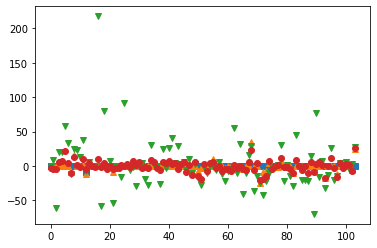

In [37]:
# 맘에 든 ridge와 lasso를 합침
plt.plot(lasso.coef_, "s")
plt.plot(lasso001.coef_, "^")
plt.plot(lasso00001.coef_, "v")
plt.plot(ridge01.coef_, "o")
plt.show()